# Sprint 1 - Task 01: Exploratory Data Analysis (EDA)

## NSL-KDD Dataset - Network Intrusion Detection System

---

### Objectives
This notebook performs a comprehensive exploratory data analysis on the **NSL-KDD** dataset, which is a benchmark dataset for network intrusion detection systems. Our goals are to:

1. **Understand the dataset structure** - dimensions, data types, and quality
2. **Analyze class distribution** - normal traffic vs attack patterns
3. **Examine feature characteristics** - distributions, skewness, and transformations needed
4. **Identify key patterns** - relationships between features and attack types
5. **Prepare insights for feature engineering** - guide preprocessing decisions

### Dataset Overview
The NSL-KDD dataset is an improved version of the original KDD Cup 1999 dataset, addressing issues like:
- Removal of redundant records
- Balanced difficulty levels
- Reasonable dataset size for training and testing

---

In [2]:
# This should be included at the top of every .ipynb file in the project
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parents[1]
sys.path.append(str(PROJECT_ROOT))

## Environment Setup & Library Imports

In [3]:
# this is an example of how to use the shared modules in the src folder
from src.test import printHi

printHi()

Hi


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


## Data Loading & Initial Inspection

### Loading the Training Dataset
We load the **KDDTrain+.csv** file which contains labeled network traffic records for training our intrusion detection models.

In [5]:
trainset = pd.read_csv("../../data/raw/KDDTrain+.csv")

In [6]:
trainset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,Normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,DoS
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,Normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,Normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,DoS


In [7]:
trainset.shape

(125972, 43)

In [8]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [9]:
(trainset.isna().sum() == True).sum()

np.int64(0)

### Data Quality Assessment

**Key Findings:**
- **No missing values** detected in the dataset
- **No duplicate rows** found
- The dataset is clean and ready for analysis

In [10]:
trainset.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'attack_class'],
      dtype='object')

In [11]:
# Checking for duplicate rows
trainset.duplicated().sum()

np.int64(0)

In [12]:
# checking for normal count
normal_count = trainset[trainset['attack'] == 'normal'].shape[0]
print(f"Number of normal attacks: {normal_count}")

# checking for attack count
attack_count = trainset[trainset['attack'] != 'normal'].shape[0]
print(f"Number of attacks: {attack_count}")

Number of normal attacks: 67342
Number of attacks: 58630


### Target Variable Analysis: Attack Distribution

In [13]:
# Checking attack types count
attack_counts = trainset['attack'].value_counts()
print(attack_counts)

attack
normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


## Class Distribution Visualization

This visualization helps us understand the class imbalance in the dataset.

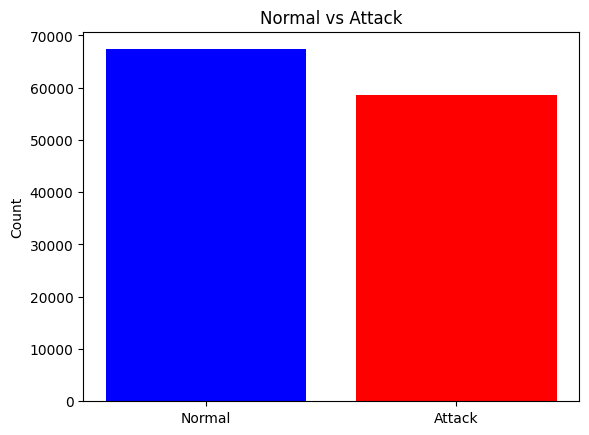

In [14]:
import matplotlib.pyplot as plt

# Bar chart: normal vs attack
normal_vs_attack = [normal_count, attack_count]
labels = ['Normal', 'Attack']
plt.bar(labels, normal_vs_attack, color=['blue', 'red'])
plt.title('Normal vs Attack')
plt.ylabel('Count')
plt.show()

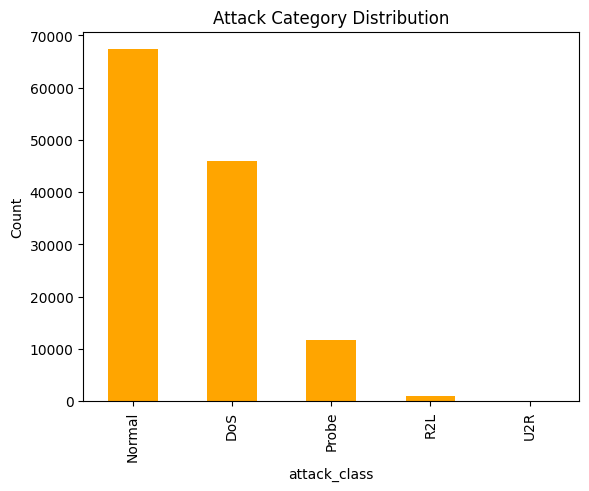

In [15]:
# Bar chart: attack category distribution
trainset["attack_class"].value_counts().plot(kind='bar', color='orange', title='Attack Category Distribution')
plt.ylabel('Count')
plt.show()

### Multi-class Classification: Attack Categories

The NSL-KDD dataset categorizes attacks into **5 main classes**:

| Category | Description | Examples |
|----------|-------------|----------|
| **Normal** | Legitimate traffic | Regular user activity |
| **DoS** | Denial of Service | neptune, smurf, pod, teardrop |
| **Probe** | Surveillance/Scanning | portsweep, ipsweep, nmap, satan |
| **R2L** | Remote to Local | ftp_write, guess_passwd, imap, phf |
| **U2R** | User to Root | buffer_overflow, loadmodule, rootkit |

In [16]:
trainset.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


### Statistical Summary of Numerical Features

The `describe()` function provides key statistics for all numerical columns:
- **count**: Number of non-null values
- **mean/std**: Central tendency and spread
- **min/25%/50%/75%/max**: Distribution quartiles

> **Observation**: Many features show high variability (large std) and extreme values, suggesting the need for **normalization** or **scaling** during preprocessing.

---

## Feature Typing and Semantic Analysis

### Complete Feature Dictionary

The table below categorizes all 41 features with their types, ranges, and notes:

| Feature | Type | Nature | Expected Range | Notes |
| --- | --- | --- | --- | --- |
| duration | Numerical | Continuous | [0, ∞) | Heavy-tailed; scale/log helpful |
| protocol_type | Categorical | — | {tcp, udp, icmp} | Low cardinality |
| service | Categorical | — | ~70+ values | Long-tail service names |
| flag | Categorical | — | ~11 TCP flags | Encodes connection status |
| src_bytes | Numerical | Continuous | [0, ∞) | Right-skew; large magnitude |
| dst_bytes | Numerical | Continuous | [0, ∞) | Right-skew; pairs with src_bytes |
| land | Binary | — | {0,1} | 1 when src IP/port equals dst; very rare |
| wrong_fragment | Numerical | Discrete | [0, 3] | Mostly zeros |
| urgent | Numerical | Discrete | [0, 3] | Almost always zero |
| hot | Numerical | Discrete | [0, ~100] | Counts sensitive ops; sparse |
| num_failed_logins | Numerical | Discrete | [0, 5] | Small ints; few positives |
| logged_in | Binary | — | {0,1} | Strong signal for normal traffic |
| num_compromised | Numerical | Discrete | [0, ~100] | Correlates with privilege escalation |
| root_shell | Binary | — | {0,1} | Rare; indicates root shell obtained |
| su_attempted | Numerical | Discrete | {0,1,2} | Ordinal small ints; rare non-zero |
| num_root | Numerical | Discrete | [0, ~100] | Often moves with num_compromised |
| num_file_creations | Numerical | Discrete | [0, ~50] | Sparse; file creation count |
| num_shells | Numerical | Discrete | [0, ~10] | Very sparse |
| num_access_files | Numerical | Discrete | [0, ~10] | Sparse |
| num_outbound_cmds | Numerical | Discrete | {0} | Constant zero; drop candidate |
| is_host_login | Binary | — | {0,1} | Nearly all zeros |
| is_guest_login | Binary | — | {0,1} | Guest sessions; skewed |
| count | Numerical | Discrete | [0, 511] | Connections from same host in last 2s |
| srv_count | Numerical | Discrete | [0, 511] | Connections to same service in last 2s |
| serror_rate | Numerical | Continuous | [0, 1] | SYN error rate last 2s |
| srv_serror_rate | Numerical | Continuous | [0, 1] | SYN error rate for same service |
| rerror_rate | Numerical | Continuous | [0, 1] | REJ error rate last 2s |
| srv_rerror_rate | Numerical | Continuous | [0, 1] | REJ error rate for same service |
| same_srv_rate | Numerical | Continuous | [0, 1] | Fraction same service last 2s |
| diff_srv_rate | Numerical | Continuous | [0, 1] | Fraction different services last 2s |
| srv_diff_host_rate | Numerical | Continuous | [0, 1] | Fraction same service, diff host |
| dst_host_count | Numerical | Discrete | [0, 255] | Connections to dst host window |
| dst_host_srv_count | Numerical | Discrete | [0, 255] | Connections to dst host with same service |
| dst_host_same_srv_rate | Numerical | Continuous | [0, 1] | Fraction same service to dst host |
| dst_host_diff_srv_rate | Numerical | Continuous | [0, 1] | Fraction different services to dst host |
| dst_host_same_src_port_rate | Numerical | Continuous | [0, 1] | Fraction same src port to dst host |
| dst_host_srv_diff_host_rate | Numerical | Continuous | [0, 1] | Fraction same service to other hosts |
| dst_host_serror_rate | Numerical | Continuous | [0, 1] | SYN error rate to dst host |
| dst_host_srv_serror_rate | Numerical | Continuous | [0, 1] | SYN error rate for service at dst host |
| dst_host_rerror_rate | Numerical | Continuous | [0, 1] | REJ error rate to dst host |
| dst_host_srv_rerror_rate | Numerical | Continuous | [0, 1] | REJ error rate for service at dst host |
| attack | Categorical | — | many labels | Target; long-tail class distribution |
| attack_class | Categorical | — | {normal, DoS, Probe, R2L, U2R} | Coarse-grain target |

---

## Numerical Feature Distribution Analysis

### Feature Grouping Strategy

For systematic analysis, we organize the 38 numerical features into **4 logical groups** based on their semantic meaning in network traffic analysis:

| Group | Description | Features Count | Key Features |
|-------|-------------|----------------|--------------|
| **Basic Connection** | Fundamental connection attributes | 9 | duration, src_bytes, dst_bytes, protocol_type |
| **Content-based** | Payload and session characteristics | 13 | hot, logged_in, num_compromised, root_shell |
| **Time-based Traffic** | Short-term (2-second window) statistics | 9 | count, srv_count, serror_rate, same_srv_rate |
| **Host-based Traffic** | Longer-term (100-connection window) statistics | 10 | dst_host_count, dst_host_srv_count, dst_host_serror_rate |

> **Insight**: This grouping helps identify which feature categories are most discriminative for different attack types.

In [17]:
connection_features = ['duration', 'protocol_type' , 'service', 'flag', 'src_bytes', 'dst_bytes' , 'land' , 'wrong_fragment' , 'urgent']
content_features = ['hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']
time_based_features = ['count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate']
host_based_features = ['dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

In [18]:
connection_features_num = trainset[connection_features].select_dtypes(include=['float64' , 'int64']).columns.tolist()
content_features_num = trainset[content_features].select_dtypes(include=['float64' , 'int64']).columns.tolist()
time_based_features_num = trainset[time_based_features].select_dtypes(include=['float64' , 'int64']).columns.tolist()
host_based_features_num = trainset[host_based_features].select_dtypes(include=['float64' , 'int64']).columns.tolist()

In [19]:
connection_features_num

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent']

In [20]:

num_features = trainset.select_dtypes(include=[np.number]).columns


skewness_values = trainset[num_features].skew().sort_values(ascending=False)


high_skew_features = skewness_values[abs(skewness_values) > 1.5].index.tolist()

print("Features that need Log-Transform:")
print(high_skew_features)

Features that need Log-Transform:
['is_host_login', 'dst_bytes', 'num_compromised', 'num_root', 'src_bytes', 'urgent', 'land', 'num_shells', 'num_file_creations', 'num_failed_logins', 'num_access_files', 'su_attempted', 'root_shell', 'hot', 'duration', 'wrong_fragment', 'is_guest_login', 'dst_host_srv_diff_host_rate', 'srv_count', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate', 'rerror_rate', 'dst_host_same_src_port_rate', 'count']


### Skewness Analysis for Feature Transformation

**Why check skewness?**
- Many ML algorithms perform better with normally distributed features
- Highly skewed features can dominate model training
- Log transformation can help normalize right-skewed distributions

**Decision Rule**: Features with |skewness| > 1.5 are candidates for log transformation

---

## Feature Distribution Visualizations

### 6.1 Connection Features Analysis

These features describe the **basic characteristics** of each network connection:

| Feature | Type | Transformation | Rationale |
|---------|------|----------------|-----------|
| **duration** | Continuous | Log-transform | Heavy-tailed distribution; many zero values |
| **src_bytes** | Continuous | Log-transform | Right-skewed; large magnitude differences |
| **dst_bytes** | Continuous | Log-transform | Right-skewed; pairs with src_bytes |
| **land** | Binary | None | Already 0/1 encoded |
| **wrong_fragment** | Discrete | None | Low cardinality (0-3) |
| **urgent** | Discrete | None | Almost constant (0) |

In [ ]:
def plot_comparison(df, feature):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # without log

    sns.histplot(df[feature], kde=True, ax=ax1, color='red')
    ax1.set_title(f'Original {feature} (Skew: {df[feature].skew():.2f})')
    

    log_transformed = np.log1p(df[feature])
    sns.histplot(log_transformed, kde=True, ax=ax2, color='green')
    ax2.set_title(f'Log-Transformed {feature} (Skew: {log_transformed.skew():.2f})')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_kde_distribution(df, column, target_col='attack_class', use_log=True):
    """
    Plots a professional KDE for numerical features to compare classes.
    """
    plt.figure(figsize=(10, 6))
    

    temp_df = df.copy()
    

    if use_log:
        temp_df[column] = np.log1p(temp_df[column])
        title_label = f"Log-Transformed {column}"
    else:
        title_label = column


    sns.kdeplot(
        data=temp_df, 
        x=column, 
        hue=target_col,    # This separates Normal vs Attack
        fill=True,         # Colors the area under the curve
        common_norm=False, # THIS IS THE KEY: it scales both curves to be visible
        palette='viridis', # Pro color scheme
        alpha=0.5,         # Transparency so you see the overlap
        linewidth=2
    )

    # 4. Styling
    plt.title(f'Distribution of {title_label}: Normal vs Attack', fontsize=15)
    plt.xlabel(f'{title_label} Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    
    plt.show()


In [23]:
def plot_discrete_bars(df, column, target_col='attack_class', use_log=True):
    """
    Plots side-by-side bars for each class at every discrete X value.
    """
    plt.figure(figsize=(12, 6))
    
    temp_df = df.copy()
    

    if use_log:
        temp_df[column] = np.log1p(temp_df[column])
        title_label = f"Log-Transformed {column}"
    else:
        title_label = column


    sns.histplot(
        data=temp_df,
        x=column,
        hue=target_col,
        multiple="dodge",     # THIS IS THE KEY: it puts bars side-by-side
        shrink=0.8,           # Adds a little space between groups for clarity
        discrete=True,        # Ensures bars center on integers (0, 1, 2...)
        stat="count",         # Use "probability" if classes have different total sizes
        common_norm=False,    # Scales bars relatively if one class is much larger
        palette='viridis'
    )


    plt.title(f'Comparison of {target_col} at each {title_label} level', fontsize=15)
    plt.xlabel(f'{title_label} Value', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(sorted(temp_df[column].unique())) 
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    
    plt.show()

#### Duration Feature Analysis

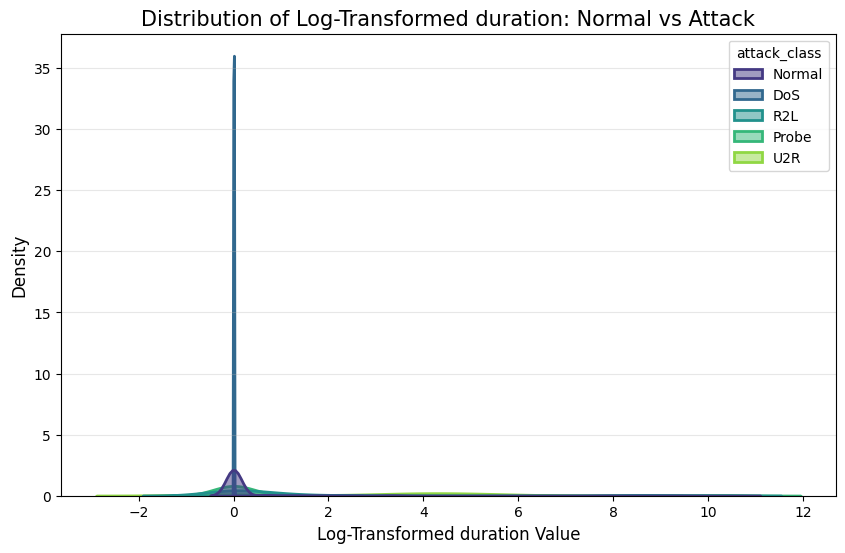

In [24]:
plot_kde_distribution(trainset , 'duration')

**Key Finding - Duration = 0:**
- When **duration = 0**, the connection is predominantly a **DoS attack**
- This makes sense as DoS attacks often involve rapid, short-lived connections designed to overwhelm the target
- **Action**: Duration is a strong discriminator for DoS detection

Let's examine the distribution when duration > 0:

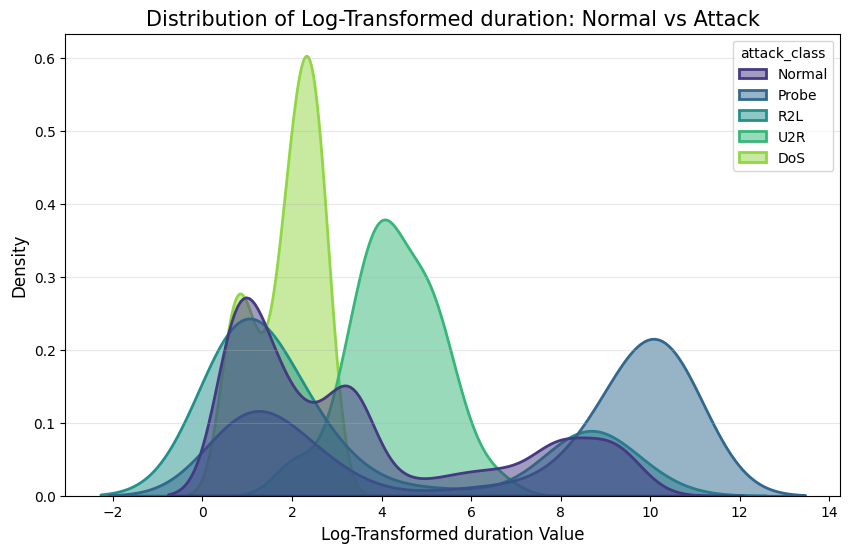

In [25]:
plot_kde_distribution(trainset[trainset['duration'] > 0] , 'duration')

#### Source Bytes (src_bytes) Analysis

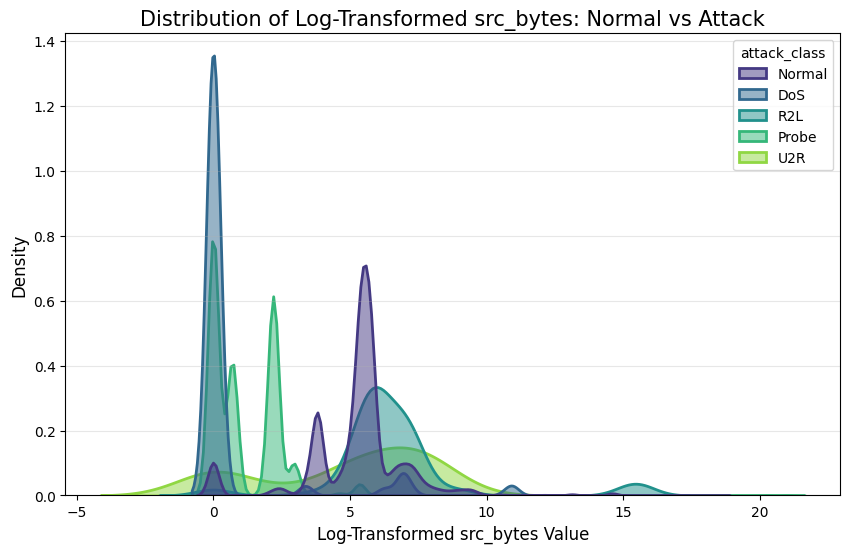

In [26]:
plot_kde_distribution(trainset , 'src_bytes')

**Key Finding - Source Bytes = 0:**
- When **src_bytes = 0**, the traffic is predominantly **DoS attacks**
- Zero-byte source packets indicate malformed or empty packets often used in flooding attacks
- **Insight**: Combined with duration = 0, this creates a strong DoS signature

#### Destination Bytes (dst_bytes) Analysis

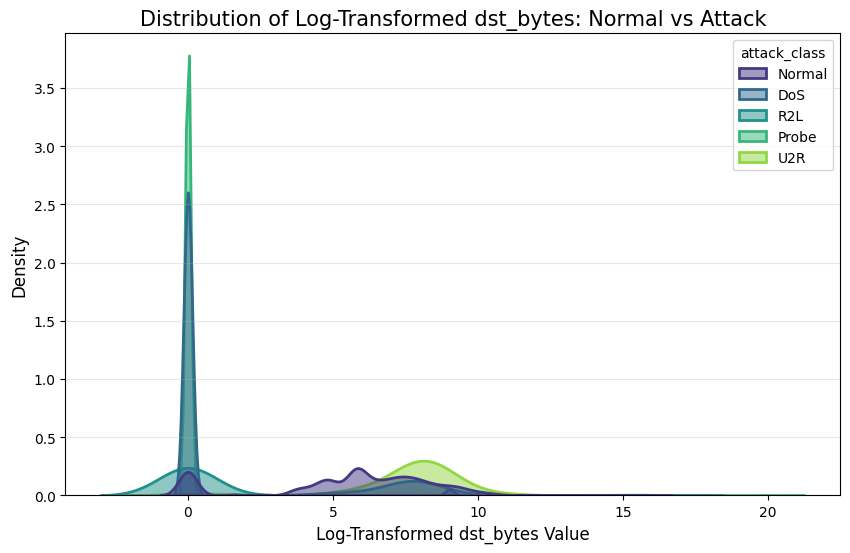

In [27]:
plot_kde_distribution(trainset , 'dst_bytes')

---

### 6.2 Time-based Traffic Features Analysis

These features capture **short-term temporal patterns** in a 2-second window:

| Feature | Description | Attack Relevance |
|---------|-------------|------------------|
| **count** | Connections from same host in last 2s | High count → DoS/Probe |
| **srv_count** | Connections to same service in last 2s | Service-specific flooding |
| **serror_rate** | SYN error rate | High rate → SYN flood attack |
| **same_srv_rate** | Fraction same service | Low rate → Port scanning |

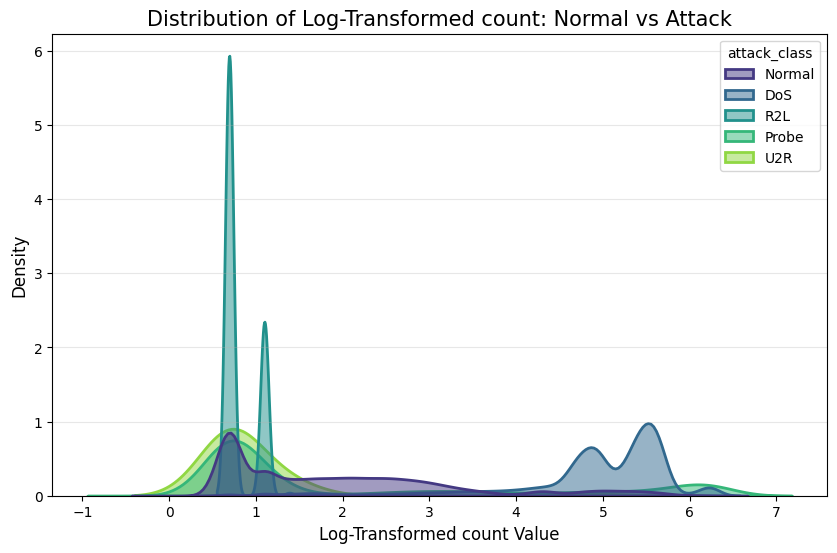

In [28]:
plot_kde_distribution(trainset , 'count')

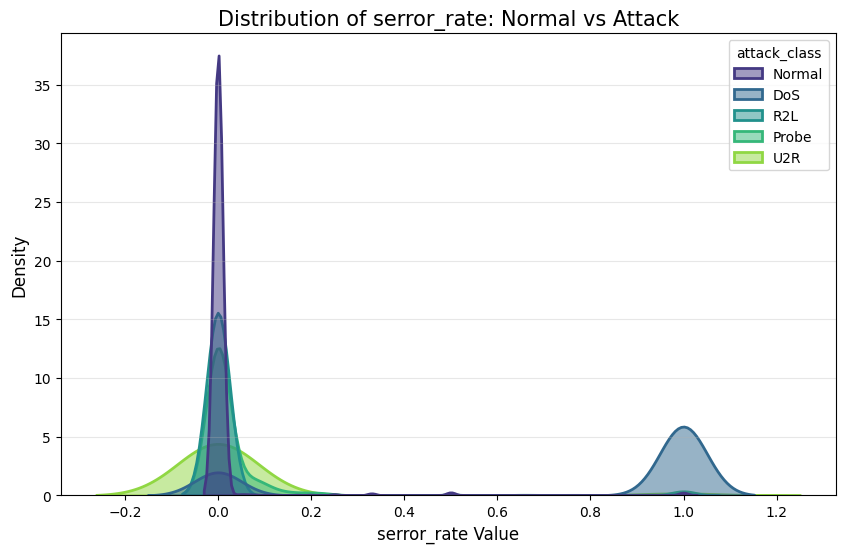

In [34]:
plot_kde_distribution(trainset , 'serror_rate' , use_log=False)

**Key Finding - SYN Error Rate:**
- **High serror_rate (close to 1)** is a strong indicator of **DoS attacks** (particularly SYN flood)
- Normal traffic typically has serror_rate close to 0
- This feature is highly discriminative and should be prioritized in feature selection

---

### 6.3 Host-based Traffic Features Analysis

These features capture **longer-term patterns** over 100 connections to the same destination host:

| Feature | Description | Attack Relevance |
|---------|-------------|------------------|
| **dst_host_srv_count** | Connections to same service at dst host | Pattern of targeted attacks |
| **dst_host_same_src_port_rate** | Fraction with same src port | High rate → automated attacks |
| **dst_host_serror_rate** | SYN error rate to dst host | Sustained attack indicator |

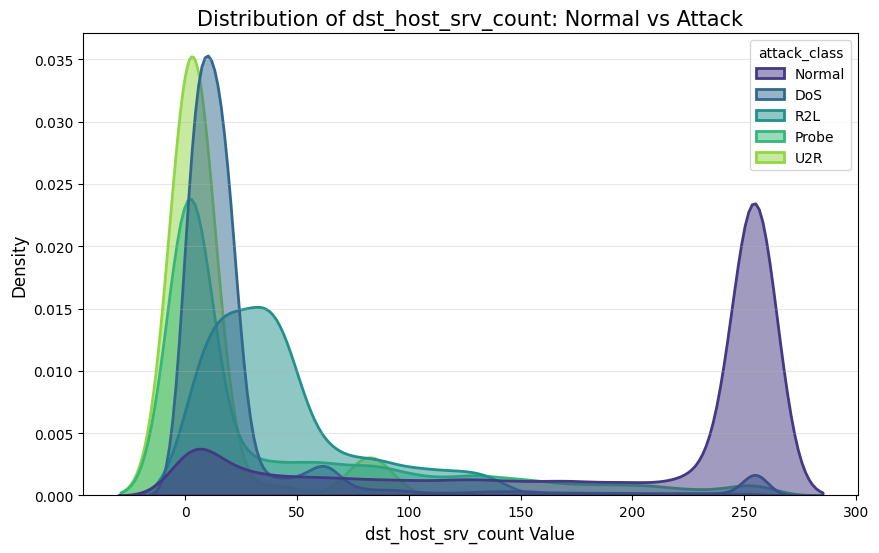

In [37]:
plot_kde_distribution(trainset , 'dst_host_srv_count' , use_log=False)

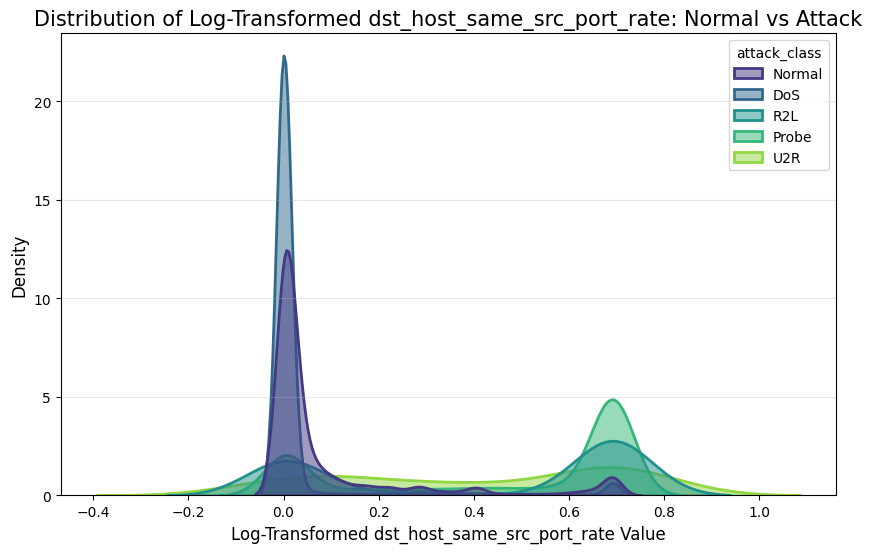

In [42]:
plot_kde_distribution(trainset , 'dst_host_same_src_port_rate')

**Key Finding - Host-based Features:**
- The bimodal distribution shows clear separation between attack types
- **DoS attacks** show concentrated patterns at extreme values
- **Probe attacks** show moderate, distributed values
- These features are essential for detecting sustained attack campaigns

---

### 6.4 Content-based Features Analysis

These features analyze the **payload and session content** of network connections:

| Feature | Type | Description |
|---------|------|-------------|
| **logged_in** | Binary | Whether user is logged in (1) or not (0) |
| **root_shell** | Binary | Whether root shell was obtained |
| **num_compromised** | Discrete | Number of compromised conditions |
| **hot** | Discrete | Number of "hot" indicators |

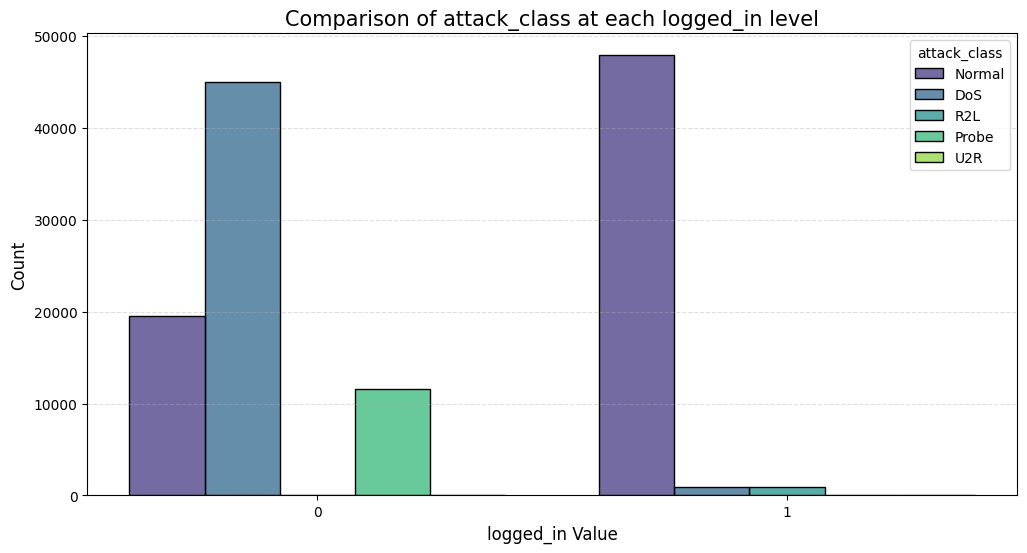

In [43]:
plot_discrete_bars(trainset , 'logged_in' , use_log=False)

**Key Finding - Login Status:**
- **logged_in = 1**: Traffic is predominantly **Normal** (legitimate authenticated sessions)
- **logged_in = 0**: Traffic is predominantly **DoS attacks** (attacks don't require authentication)
- **Insight**: This binary feature is extremely discriminative for DoS detection

> **Important**: This feature alone can separate a large portion of DoS attacks from normal traffic. It should be a high-priority feature in any model.

---

## Categorical Feature Analysis

In [30]:
# Data Preparation
trainset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,Normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,DoS
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,Normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,Normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,DoS


### Identifying Categorical Columns

The dataset contains **4 categorical features** that require encoding:
- `protocol_type`: Network protocol (tcp, udp, icmp)
- `service`: Network service type (~70 unique values)
- `flag`: TCP connection status (~11 values)
- `attack` / `attack_class`: Target variables

In [31]:
cat_cols = trainset.select_dtypes(include=['object']).columns
cat_cols

Index(['protocol_type', 'service', 'flag', 'attack', 'attack_class'], dtype='object')

In [32]:
cat_summary = {}
for col in cat_cols:
    vc = trainset[col].value_counts(dropna=False)
    cat_summary[col] = {
        "unique": vc.shape[0],
        "top5": vc.head(5).to_dict(),
        "tail_frac": vc.iloc[5:].sum() / vc.sum() if vc.shape[0] > 5 else 0.0
    }
pd.DataFrame([{ "feature": k, **v } for k,v in cat_summary.items()])

,feature,unique,top5,tail_frac
0,protocol_type,3,"{'tcp': 102688, 'udp': 14993, 'icmp': 8291}",0.000000
1,service,70,"{'http': 40338, 'private': 21853, 'domain_u': ...",0.322024
2,flag,11,"{'SF': 74944, 'S0': 34851, 'REJ': 11233, 'RSTR...",0.007629
3,attack,23,"{'normal': 67342, 'neptune': 41214, 'satan': 3...",0.057576
4,attack_class,5,"{'Normal': 67342, 'DoS': 45927, 'Probe': 11656...",0.000000


### Categorical Features Summary

The table below shows the cardinality and distribution characteristics of each categorical feature:

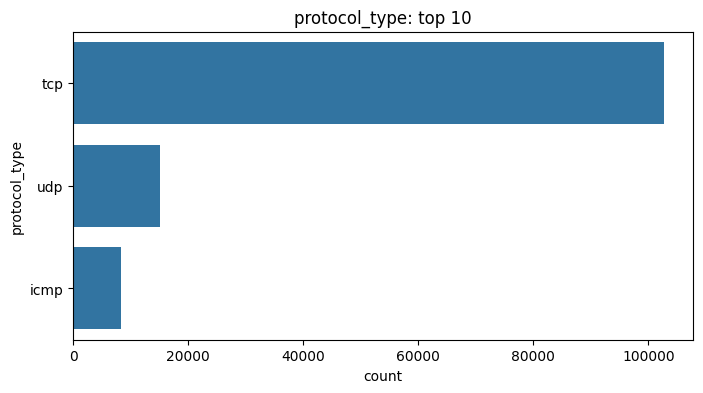

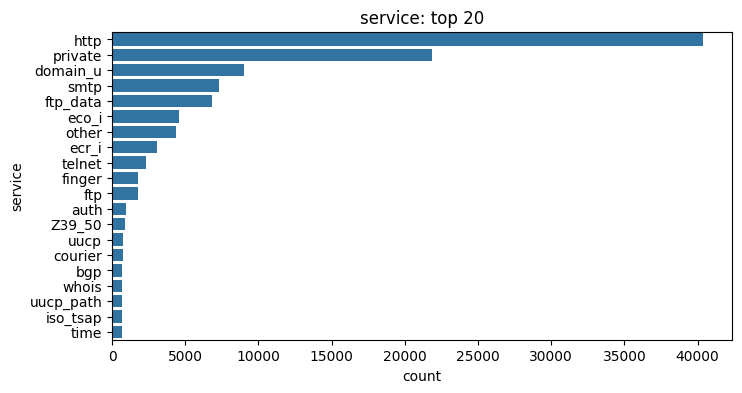

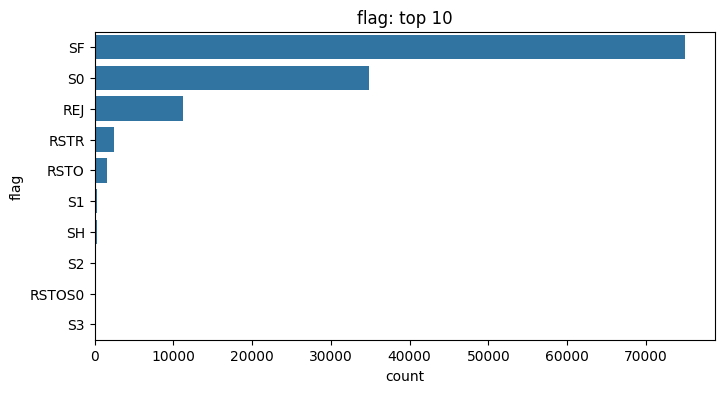

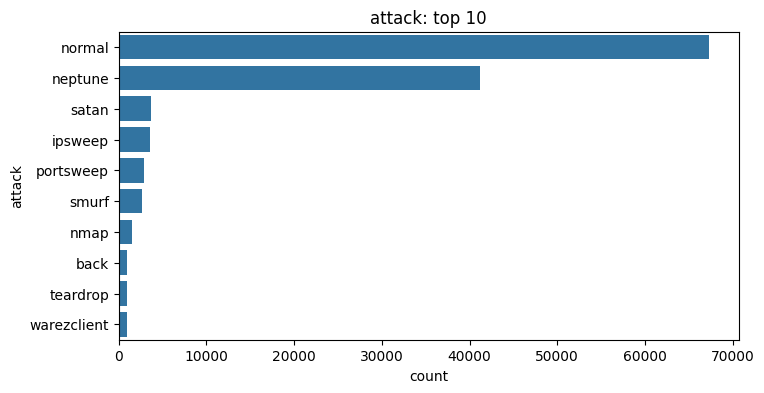

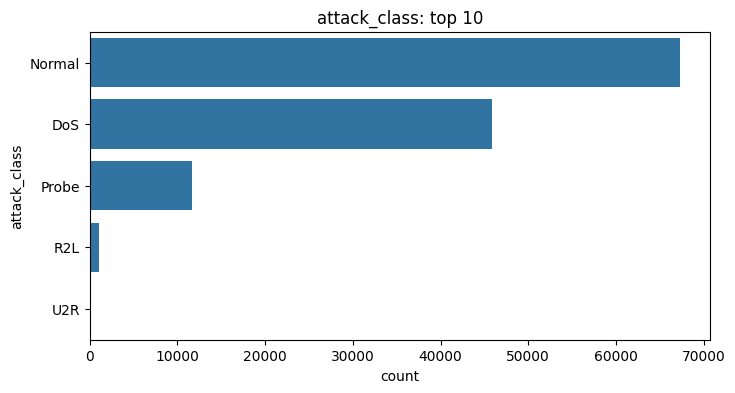

In [33]:

def plot_top_n(col, n=15):
    vc = trainset[col].value_counts().head(n)
    plt.figure(figsize=(8,4))
    sns.barplot(x=vc.values, y=vc.index, orient="h")
    plt.title(f"{col}: top {n}")
    plt.xlabel("count")
    plt.show()

for col in cat_cols:
    plot_top_n(col, n=20 if col=="service" else 10)

### Distribution of Categorical Features

The following visualizations show the frequency distribution of each categorical feature:

---

## EDA Summary & Key Conclusions

### Dataset Overview
| Metric | Value |
|--------|-------|
| Total Records | ~125,973 |
| Total Features | 43 (41 features + 2 targets) |
| Missing Values | **0** (Clean dataset) |
| Duplicate Rows | **0** |
| Numerical Features | 38 |
| Categorical Features | 4 |

### Class Distribution Insights
1. **Binary Classification**: The dataset is slightly imbalanced with more normal traffic than attack
2. **Multi-class**: DoS attacks dominate, while U2R and R2L are rare (class imbalance issue)
3. **Action Required**: Consider SMOTE or class weights during model training

### Most Discriminative Features (for DoS detection)
| Feature | Pattern | Interpretation |
|---------|---------|----------------|
| `logged_in` | 0 → DoS, 1 → Normal | Authentication status is key |
| `duration` | 0 → DoS | Short/instant connections |
| `src_bytes` | 0 → DoS | Empty packets in flood attacks |
| `serror_rate` | High → DoS | SYN flood signature |
| `count` | High → DoS/Probe | Connection frequency spike |

### Preprocessing Recommendations
1. **Log Transform**: Apply to `duration`, `src_bytes`, `dst_bytes`, `count`, and other highly skewed features
2. **Encoding**: Use one-hot encoding for `protocol_type` and `flag`; consider target encoding for `service` (high cardinality)
3. **Feature Selection**: `num_outbound_cmds` is constant (all zeros) - candidate for removal
4. **Scaling**: StandardScaler or MinMaxScaler recommended after transformations
